Team name: Visages Villages

Team members: Gizem Dikdere, Özgün Deniz Gezerli

In [2]:
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
import numpy as np
np.random.seed(7)


Using TensorFlow backend.


In [64]:
data=pd.read_csv('ConversionDataSet.csv', index_col=0, encoding='utf-8')
data.head(10)



,month,Kauf,sessionStartHour,dayOfMonth,weekday,sessionTime,category,pageVisitedBeforeSession,amountBasketSession,totalItemValueBasketSession,...,browserVersion,operatingSystem,operatingSystemVersion,majorCity,screenWidth,screenHeight,windowWidth,windowHeight,tabVisible,visitorKnown
4,8,0,21,1,6,20,overview,0,0.00,0,...,1,Windows 7,1,0,1280,1024,1280,844,1,0
14,8,0,0,1,6,85,search,1,0.00,0,...,2,Windows 8,1,0,1366,768,1339,634,1,1
51,8,0,10,1,6,23,overview,0,0.00,0,...,2,Windows 8.1,1,0,1600,900,1600,799,1,1
60,8,0,8,1,6,162,overview,1,9.95,1,...,2,Windows 7,1,0,1280,1024,1280,891,1,1
70,8,0,17,1,6,52,product,0,39.90,1,...,2,Windows 7,1,1,1600,900,1600,775,1,1
97,8,0,22,1,6,374,overview,0,0.00,0,...,2,Windows 7,1,0,1366,768,1366,667,1,1
102,8,0,8,1,6,69,account,1,0.00,0,...,2,Windows 7,1,1,1280,1024,500,100,0,1
106,8,0,21,1,6,154,sale,1,0.00,0,...,2,Windows 7,1,0,1366,768,1366,657,1,1
111,8,0,9,1,6,165,overview,0,0.00,0,...,2,Windows 8.1,1,0,1600,900,1600,775,1,1
116,8,0,15,1,6,62,sale,1,0.00,0,...,2,Windows 7,1,0,1280,1024,1280,923,1,1


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51349 entries, 4 to 585566
Data columns (total 96 columns):
month                             51349 non-null int64
Kauf                              51349 non-null int64
sessionStartHour                  51349 non-null int64
dayOfMonth                        51349 non-null int64
weekday                           51349 non-null int64
sessionTime                       51349 non-null int64
category                          51349 non-null object
pageVisitedBeforeSession          51349 non-null int64
amountBasketSession               51349 non-null float64
totalItemValueBasketSession       51349 non-null int64
sessionProduct                    51349 non-null int64
sessionSearch                     51349 non-null int64
sessionOverview                   51349 non-null int64
sessionSale                       51349 non-null int64
sessionCart                       51349 non-null int64
percPageProduct                   51349 non-null float64
percP

Firstly, an overview is created about the dataset by using .info() method. There are 51349 entries and 96 columns. Fortunately, there are not any missing values so dropping or filling is not necessary. In total, there are 40 float, 53 integer and 3 object type features. The features with object type are handled later.

In [66]:
data.shape 

(51349, 96)

The data shape is checked. The number of rows is 51349 and the number of columns is 96. There is one (binary) target variable as mentioned in the mini challange task, so there are 95 input variables.

In [67]:
data['Kauf'].value_counts()/len(data.Kauf)  # data imbalance
print(data['Kauf'].value_counts()/len(data.Kauf),"\n",data['Kauf'].value_counts())

0    0.919921
1    0.080079
Name: Kauf, dtype: float64 
 0    47237
1     4112
Name: Kauf, dtype: int64


Kauf is the binary target variable. Before setting a deep neural network, it is checked if the data is balanced or not. The percentage of "1"s is about 8% and percenatge of "0"s is about 92% in the data. Hence, the data is not balanced at all. Data imbalance issue is handled later.

In [68]:

X=data.drop('Kauf', axis=1)
X.head()



,month,sessionStartHour,dayOfMonth,weekday,sessionTime,category,pageVisitedBeforeSession,amountBasketSession,totalItemValueBasketSession,sessionProduct,...,browserVersion,operatingSystem,operatingSystemVersion,majorCity,screenWidth,screenHeight,windowWidth,windowHeight,tabVisible,visitorKnown
4,8,21,1,6,20,overview,0,0.00,0,0,...,1,Windows 7,1,0,1280,1024,1280,844,1,0
14,8,0,1,6,85,search,1,0.00,0,0,...,2,Windows 8,1,0,1366,768,1339,634,1,1
51,8,10,1,6,23,overview,0,0.00,0,0,...,2,Windows 8.1,1,0,1600,900,1600,799,1,1
60,8,8,1,6,162,overview,1,9.95,1,1,...,2,Windows 7,1,0,1280,1024,1280,891,1,1
70,8,17,1,6,52,product,0,39.90,1,1,...,2,Windows 7,1,1,1600,900,1600,775,1,1


The input variables are created as "X" by dropping the "Kauf" column.

In [69]:

X= pd.get_dummies(X, prefix_sep="_",columns=X.select_dtypes(include=[object]).columns).values
y=data['Kauf']
y.describe()

count    51349.000000
mean         0.080079
std          0.271419
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Kauf, dtype: float64

Dummy encoding is used to deal with the object type variables. They are converted into dummy variables by using get_dummies. Then .values is used to convert the dataframe into array. The "Kauf" column is stored as target variable, y.

In [70]:
from sklearn.model_selection import train_test_split
seed=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=seed)
    
print (X_train.shape)
print(y_train.shape) 
print(type(X_train))
print(type(y_train))
print(X_train)
print(y_train)



(35944, 128)
(35944,)
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
[[ 8.  8. 18. ...  0.  0.  0.]
 [ 8. 15. 17. ...  0.  0.  0.]
 [ 8. 15. 21. ...  0.  0.  0.]
 ...
 [ 9.  9. 16. ...  0.  0.  0.]
 [ 8. 16.  2. ...  0.  0.  0.]
 [ 8. 13. 24. ...  0.  0.  0.]]
137400    0
134461    0
159180    0
553144    0
359762    0
131851    0
376474    0
57131     0
207746    0
62238     0
461157    0
71729     0
170741    0
67202     0
394398    0
105914    0
80274     1
513444    0
503136    0
272700    0
469963    0
25741     0
41372     0
472885    0
280923    0
58103     0
10289     0
464247    0
234668    0
334350    0
         ..
2430      0
33191     0
215676    0
221273    0
297907    0
476892    0
318718    0
75813     0
333446    0
230935    0
206440    0
452134    0
437077    0
62688     0
29648     0
9480      0
20358     1
473180    0
188466    0
507012    0
540582    0
256324    0
430253    0
198443    1
74288     0
133611    0
513688    0
440711    0
10595     0
185760

The dataset is seperated into train and test sets by using train_test_split. As test size 0.30 is chosen.

In [71]:

from imblearn.over_sampling import SMOTE
from collections import Counter
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))

[(0, 33081), (1, 33081)]


Data imbalance problem is solved by SMOTE method which is an oversampling technique. After applying oversampling to the train data, the number of "1"s is increased and equalized to the number of "0"s.



In [72]:
y_resampled=np.array(y_resampled)
y_resampled



array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [73]:
print(type(X_resampled),type(X_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [74]:

y_test=np.array(y_test)
y_test


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_resampled)
X_resampled= scaler.transform(X_resampled)
X_test= scaler.transform(X_test)  
X_resampled

array([[-1.24352731, -1.46125169,  0.23908436, ..., -0.0548365 ,
        -0.23644604, -0.2069101 ],
       [-1.24352731,  0.06218368,  0.117904  , ..., -0.0548365 ,
        -0.23644604, -0.2069101 ],
       [-1.24352731,  0.06218368,  0.60262544, ..., -0.0548365 ,
        -0.23644604, -0.2069101 ],
       ...,
       [-0.89035304,  0.85698576,  0.85031127, ..., -0.0548365 ,
        -0.23644604, -0.2069101 ],
       [ 0.50117166, -1.11075208,  1.45406986, ..., -0.0548365 ,
        -0.23644604,  0.92372796],
       [-1.24352731, -0.6435786 , -0.32173213, ..., -0.0548365 ,
        -0.23644604, -0.2069101 ]])

The train values of input variables are standardized to prevent one variable to dominate the others. With the standardization, the data is normally distributed with zero mean and unit variance. Additionaly, the train input values are used to prevent leakage of data to the test set.

In [76]:
n_cols=X_resampled[42].shape
print(n_cols)
X_train=X_resampled
y_train=y_resampled

(128,)


The input shape is checked before setting the model.

In [77]:

def network(x_train,y_train,x_test,y_test,params):
  model=Sequential()
  model.add(Dense(128, activation='relu', kernel_initializer=keras.initializers.he_normal(seed=seed), bias_initializer='zeros',input_shape=n_cols ))
  model.add(Dropout(params['dropout']))
  model.add(Dense(128, activation='relu', kernel_initializer=keras.initializers.he_normal(seed=seed), bias_initializer='zeros'))
  model.add(Dropout(params['dropout']))
  #model.add(Dense(8, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  #my_optimizer = SGD(lr=0.02)
  model.compile(optimizer=params['optimizer'](lr=lr_normalizer(params['lr'],params['optimizer'])), loss='binary_crossentropy', metrics=['accuracy'])
  history = model.fit(x_train, y_train, 
                        validation_data=[x_test, y_test],
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        verbose=0)
  return history,model
 



In order to build a deep neural network (DNN) Keras library is imported. A DNN is defined inside the network function. The function gets parameters, train data, and test data as inputs and gives the model and the fitted version of the model as outputs. The number of layers and the number of units are set to 2 and 128, respectively. Relu is used as activation function in all layers except output layer. Since this is a binary classification problem, sigmoid is used as activation function in the output layer and loss is determined as binary crossentropy. Moreover, metrics is set to accuracy.

In [16]:

import talos as ta
from talos.model.normalizers import lr_normalizer
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
p = {'lr': (0.001, 0.01, 0.02,0.1,0.5),
     'batch_size': (16, 32, 64,128),
     'epochs': [10,30,60],
     'dropout': (0, 0.1, 0.2),
     'optimizer': [SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam]}
t = ta.Scan(x=X_train,
            y=y_train,
            model=network,
            grid_downsample=None, 
            params=p,
            dataset_name='sigmoid',
            val_split=0.3,
            experiment_no='1')

  0%|          | 0/336 [00:00<?, ?it/s]

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


100%|██████████| 336/336 [8:42:14<00:00, 119.47s/it]


Talos library is used to find the best performing hyperparameters. Since it takes too much time to run the code, 5 hyperparameters are selected for tuning. These parameters are learning rate, number of epochs, batch size, dropout rate, and optimizer.

[[60 20 "<class 'keras.optimizers.Nadam'>" 0.0 0.001 0]
 [60 16 "<class 'keras.optimizers.Nadam'>" 0.0 0.001 1]
 [60 18 "<class 'keras.optimizers.Nadam'>" 0.0 0.001 2]
 [60 17 "<class 'keras.optimizers.Nadam'>" 0.0 0.001 3]
 [60 19 "<class 'keras.optimizers.Nadam'>" 0.0 0.001 4]
 [60 22 "<class 'keras.optimizers.Nadam'>" 0.0 0.001 5]
 [60 24 "<class 'keras.optimizers.Nadam'>" 0.0 0.001 6]
 [60 25 "<class 'keras.optimizers.Nadam'>" 0.0 0.001 7]
 [60 23 "<class 'keras.optimizers.Nadam'>" 0.0 0.001 8]
 [60 29 "<class 'keras.optimizers.Nadam'>" 0.0 0.001 9]] 0.75870584276711
     NaN  epochs  batch_size   val_acc                           optimizer  \
45    45      60          20  0.758706    <class 'keras.optimizers.Nadam'>   
223  223      60          16  0.758706    <class 'keras.optimizers.Nadam'>   
249  249      60          18  0.758151    <class 'keras.optimizers.Nadam'>   
318  318      60          17  0.757547    <class 'keras.optimizers.Nadam'>   
243  243      60          19  0.

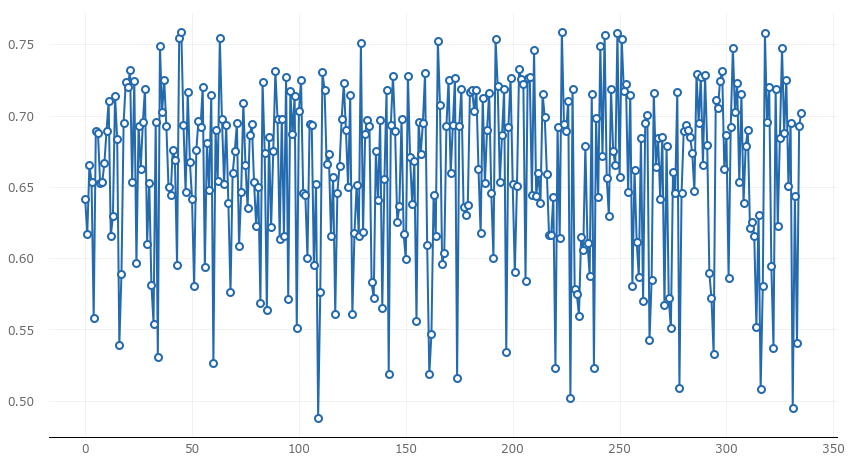

In [17]:
r = ta.Reporting(t)
best=r.best_params()
highest=r.high('val_acc')
print(best,highest)
r.plot_line()
pd.set_option('display.max_columns', 500)

print(r.table(),'\n','\n')

Best performing parameters are stored in the best variable. In order to compare all of the models created, table is printed. The models are sorted according to their validation accuracy in this table. Additionally, a line plot is printed to see the performance of the models clearly. Vertical axis shows validation accuracy and horizontal axis shows the id of the models in this plot. The best performing model is 210th one and has SGD as optimizer, 25 for batch size, 0.001 for learning rate, 0.0 for dropout rate, and 60 epochs. The validation accuracy of the best model is 0.905809797914877.

In [95]:
from keras.callbacks import EarlyStopping
early_stopping_monitor=EarlyStopping(patience=20)


Early stopping is used during the tuning process but it is not used in the finalized models.

In [96]:

from keras.optimizers import SGD,RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
model=Sequential()
model.add(Dense(128, activation='relu', kernel_initializer=keras.initializers.he_normal(seed=seed), bias_initializer='zeros',input_shape=n_cols ))
#model.add(Dropout(0.1))
model.add(Dense(128, activation='relu', kernel_initializer=keras.initializers.he_normal(seed=seed), bias_initializer='zeros'))
#model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train,validation_data=[X_test, y_test], batch_size=32,epochs=60,verbose=1,callbacks=[early_stopping_monitor])

Train on 66162 samples, validate on 15405 samples
Epoch 1/60
66162/66162 [==============================] - 4s 54us/step - loss: 0.4438 - acc: 0.7930 - val_loss: 0.4228 - val_acc: 0.8305
Epoch 2/60
66162/66162 [==============================] - 3s 41us/step - loss: 0.2781 - acc: 0.8865 - val_loss: 0.3666 - val_acc: 0.8656
Epoch 3/60
66162/66162 [==============================] - 3s 45us/step - loss: 0.2091 - acc: 0.9169 - val_loss: 0.3627 - val_acc: 0.8921
Epoch 4/60
66162/66162 [==============================] - 3s 43us/step - loss: 0.1695 - acc: 0.9348 - val_loss: 0.4050 - val_acc: 0.8754
Epoch 5/60
66162/66162 [==============================] - 3s 43us/step - loss: 0.1413 - acc: 0.9459 - val_loss: 0.4610 - val_acc: 0.8604
Epoch 6/60
66162/66162 [==============================] - 3s 52us/step - loss: 0.1219 - acc: 0.9542 - val_loss: 0.4517 - val_acc: 0.8817
Epoch 7/60
66162/66162 [==============================] - 4s 60us/step - loss: 0.1077 - acc: 0.9592 - val_loss: 0.4757 - val_acc

In [100]:
predictions=model.predict_classes(X_test)
predictions

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [101]:
from sklearn.metrics import confusion_matrix
print ('\nConfusion matrix:\n', confusion_matrix(y_test,predictions))


Confusion matrix:
 [[13399   757]
 [  974   275]]


In [102]:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,predictions)
auc_score

0.5833502914227398

In [134]:
from sklearn.metrics import classification_report
target_names = ["0","1"]
print ('\nClasification report:\n', classification_report(y_test, predictions, target_names=target_names))


Clasification report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91     14166
           1       0.23      0.38      0.29      1239

    accuracy                           0.85     15405
   macro avg       0.59      0.63      0.60     15405
weighted avg       0.89      0.85      0.86     15405



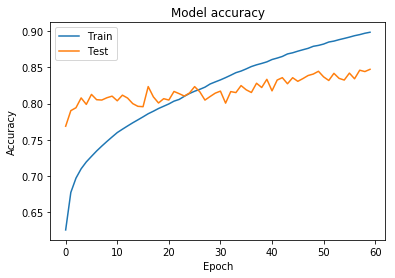

In [141]:
import matplotlib.pyplot as plt


plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

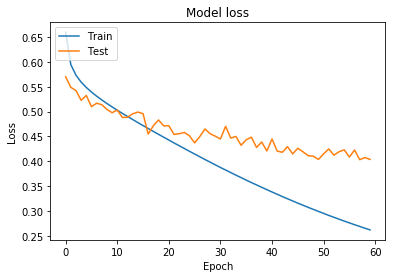

In [140]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

The best performing model is compiled and fitted. Validation accuracy of the model is 0.8474. Confusion matrix, auc score, and classification report of the model is printed. Auc score of the model is 0.635. Precision and recall of the model are 0.23 and 0.38 for ones, 0.94 and 0.89 for zeros, respectively. Model accuracy and model loss graphs are drawn. Since test accuracy has an upward trend and test loss has a downward trend, a new model with more epochs is implemented. Also, dropouts are added to the new model in order to prevent overfitting.

In [121]:

from keras.optimizers import SGD,RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
model=Sequential()
model.add(Dense(128, activation='relu', kernel_initializer=keras.initializers.he_normal(seed=seed), bias_initializer='zeros',input_shape=n_cols ))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu', kernel_initializer=keras.initializers.he_normal(seed=seed), bias_initializer='zeros'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=SGD(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train,validation_data=[X_test, y_test], batch_size=32,epochs=250,verbose=1)

Train on 66142 samples, validate on 15405 samples
Epoch 1/250
66142/66142 [==============================] - 3s 52us/step - loss: 0.6846 - acc: 0.6070 - val_loss: 0.5670 - val_acc: 0.7660
Epoch 2/250
66142/66142 [==============================] - 3s 43us/step - loss: 0.6181 - acc: 0.6591 - val_loss: 0.5202 - val_acc: 0.8118
Epoch 3/250
66142/66142 [==============================] - 3s 42us/step - loss: 0.5964 - acc: 0.6759 - val_loss: 0.5289 - val_acc: 0.8049
Epoch 4/250
66142/66142 [==============================] - 3s 45us/step - loss: 0.5846 - acc: 0.6868 - val_loss: 0.5110 - val_acc: 0.8208
Epoch 5/250
66142/66142 [==============================] - 3s 43us/step - loss: 0.5751 - acc: 0.6941 - val_loss: 0.5306 - val_acc: 0.8029
Epoch 6/250
66142/66142 [==============================] - 3s 49us/step - loss: 0.5667 - acc: 0.7029 - val_loss: 0.5282 - val_acc: 0.8043
Epoch 7/250
66142/66142 [==============================] - 4s 66us/step - loss: 0.5617 - acc: 0.7075 - val_loss: 0.5154 - 

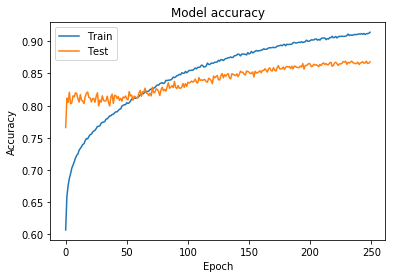

In [122]:
import matplotlib.pyplot as plt


plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

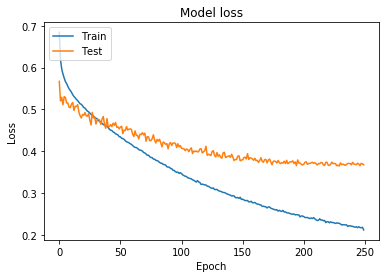

In [123]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [124]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3674989054484322
Test accuracy: 0.8679649464459591


In [125]:
predictions=model.predict_classes(X_test)
predictions

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [126]:
from sklearn.metrics import classification_report
target_names = ["0","1"]
print ('\nClasification report:\n', classification_report(y_test, predictions, target_names=target_names))


Clasification report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93     14166
           1       0.26      0.34      0.29      1239

    accuracy                           0.87     15405
   macro avg       0.60      0.63      0.61     15405
weighted avg       0.89      0.87      0.88     15405



In [127]:
from sklearn.metrics import confusion_matrix
print ('\nConfusion matrix:\n', confusion_matrix(y_test,predictions))


Confusion matrix:
 [[12954  1212]
 [  822   417]]


In [128]:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,predictions)
auc_score

0.625502387977352

The new model is compiled and fitted. Validation accuracy of the model is 0.8680. Confusion matrix, auc score, and classification report of the model is printed. Auc score of the model is 0.626. Precision and recall of the model are 0.26 and 0.34 for ones, 0.94 and 0.91 for zeros, respectively. Model accuracy and model loss graphs are drawn. One can see that dropouts eliminated the overfitting problem. 

From precision and recall of ones, it can be said that both models are performing bad in predicting ones. This is expected because of the imbalance of the data. Even though the imbalance of the train data is eliminated by oversampling, the imbalance of the test data is still exists.

From precision and recall of zeros, it can be said that both models are performing well in predicting zeros. The difference in precisions and recalls between ones and zeros can also be explained by the imbalance of the data.

Since the data is imbalanced, it is more reasonable to use auc score as metric instead of validation accuracy because even though a high accuracy can be reached, the precisions and recalls may not be high. For this reason, the model with the higher auc score is chosen as the final model which is the old model that talos gives. 